In [1]:
import pandas as pd
import streamlit as st
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("./data/cancer_prediction_dataset.csv")
df

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
0,1,85,1,0,1,0
1,1,93,0,0,0,0
2,1,72,0,1,0,0
3,0,58,0,0,1,0
4,1,95,1,0,1,1
...,...,...,...,...,...,...
9995,1,89,1,0,1,0
9996,0,23,1,1,0,0
9997,1,99,0,0,1,0
9998,0,26,0,1,1,0


In [3]:
df.describe()

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.497500,59.318400,0.500200,0.501800,0.499900,0.096400
std,0.500019,23.908952,0.500025,0.500022,0.500025,0.295154
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,60.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,80.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df["Gender"].value_counts()

Gender
0    5025
1    4975
Name: count, dtype: int64

In [5]:
df["Smoking"].value_counts()

Smoking
1    5002
0    4998
Name: count, dtype: int64

In [6]:
df["Fatigue"].value_counts()

Fatigue
1    5018
0    4982
Name: count, dtype: int64

In [7]:
df["Allergy"].value_counts()

Allergy
0    5001
1    4999
Name: count, dtype: int64

In [8]:
df["Cancer"].value_counts()

Cancer
0    9036
1     964
Name: count, dtype: int64

In [9]:
df["Age"].mean()

59.3184

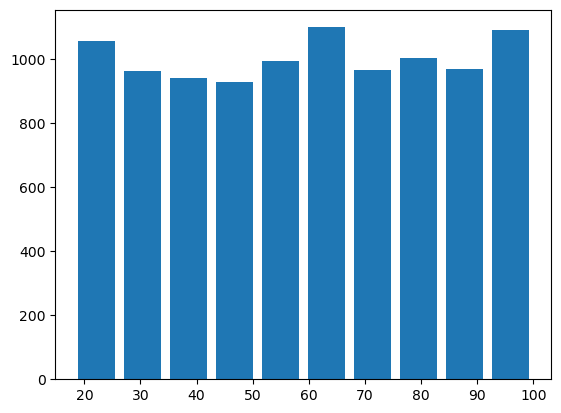

In [10]:
plt.hist(data=df , x ="Age", rwidth=0.8)
plt.show()

In [145]:
df["Cancer"].value_counts().sort_index()

Cancer
0    9036
1     964
Name: count, dtype: int64

In [136]:
df["Gender"].value_counts().sort_index()

Gender
0    5025
1    4975
Name: count, dtype: int64

In [143]:
df["Smoking"].value_counts().sort_index()

Smoking
0    4998
1    5002
Name: count, dtype: int64

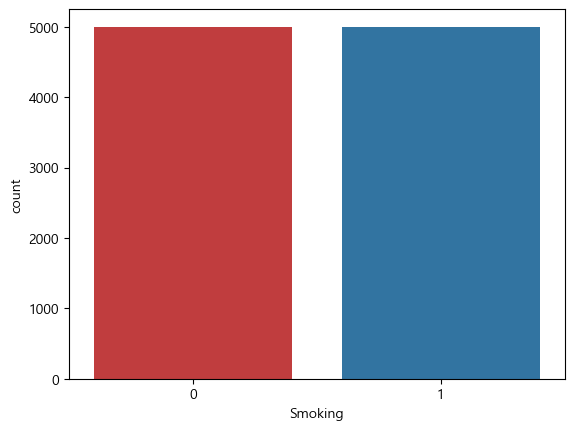

In [126]:
colors = random.sample(sb.color_palette(), 2)
sb.countplot(data=df , x="Smoking", palette=[colors[0],colors[1]])
plt.show()

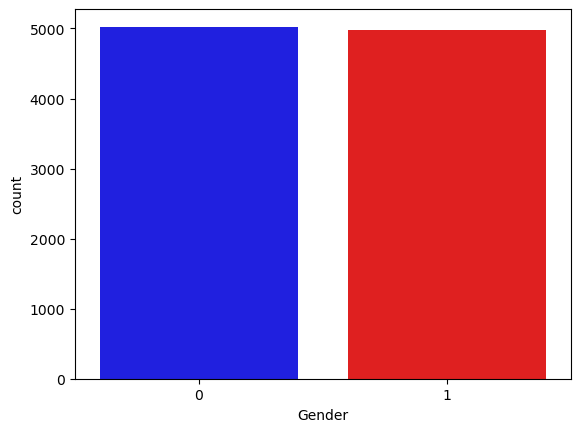

In [12]:
colors = random.sample(sb.color_palette(), 2)

sb.countplot(data=df , x="Gender", palette=["blue","red"])
plt.show()

In [13]:
df.loc[df["Cancer"] == 1]

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
4,1,95,1,0,1,1
7,0,53,0,1,0,1
36,0,49,1,1,1,1
37,1,63,1,0,0,1
47,1,71,0,0,1,1
...,...,...,...,...,...,...
9939,0,59,0,1,1,1
9941,1,35,0,0,1,1
9954,0,53,1,1,0,1
9976,0,23,1,1,1,1


In [27]:
df

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
0,1,85,1,0,1,0
1,1,93,0,0,0,0
2,1,72,0,1,0,0
3,0,58,0,0,1,0
4,1,95,1,0,1,1
...,...,...,...,...,...,...
9995,1,89,1,0,1,0
9996,0,23,1,1,0,0
9997,1,99,0,0,1,0
9998,0,26,0,1,1,0


In [69]:
# X, y 로 나누기
X = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

In [70]:
y

0       0
1       0
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Cancer, Length: 10000, dtype: int64

In [114]:
# train, test 데이터로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [72]:
# 모델링
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

In [73]:
# 학습
model.fit(X_train, y_train)

LogisticRegression()

In [74]:
# 테스트
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
y_test

9394    0
898     0
2398    1
5906    0
2343    0
       ..
1037    0
2899    1
9549    0
2740    0
6690    0
Name: Cancer, Length: 2000, dtype: int64

In [76]:
model.score(X_test,y_test)

0.9045

In [49]:
model.coef_

array([[-0.07447886, -0.0022345 , -0.04257606, -0.02286537,  0.00395796]])

In [51]:
model.intercept_

array([-2.03677044])

In [105]:
new

array([[ 0, 98,  1,  1,  1]])

In [146]:
model.predict_proba([[0, 50 ,0 , 0 , 0]])

C:\Users\4005\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.89552808, 0.10447192]])

In [103]:
# 예측
model.predict(new)

C:\Users\4005\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [116]:
y_train.size , df["Gender"].size

(8000, 10000)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
# y 실제값과 y예측값을 이용해 모델의 정확도 구하기
accuracy_score(y_test, y_pred)

0.9045

In [78]:
import joblib

In [79]:
joblib.dump(model, "model.pkl")

['model.pkl']

In [87]:
df

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
0,1,85,1,0,1,0
1,1,93,0,0,0,0
2,1,72,0,1,0,0
3,0,58,0,0,1,0
4,1,95,1,0,1,1
...,...,...,...,...,...,...
9995,1,89,1,0,1,0
9996,0,23,1,1,0,0
9997,1,99,0,0,1,0
9998,0,26,0,1,1,0


In [90]:
df.corr()

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
Gender,1.000000,0.015459,0.007802,-0.011382,-0.007201,-0.014631
Age,0.015459,1.000000,-0.007384,-0.011392,-0.006372,-0.016963
Smoking,0.007802,-0.007384,1.000000,0.011199,0.019400,-0.004197
Fatigue,-0.011382,-0.011392,0.011199,1.000000,0.006201,-0.001854
Allergy,-0.007201,-0.006372,0.019400,0.006201,1.000000,0.004131
Cancer,-0.014631,-0.016963,-0.004197,-0.001854,0.004131,1.000000


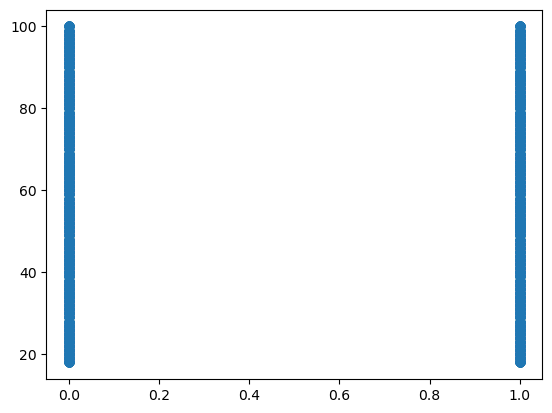

In [94]:
plt.scatter(data=df, x="Gender", y="Age")
plt.show()

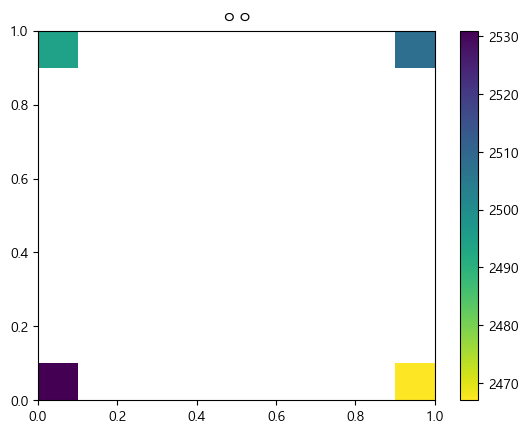

In [106]:
plt.hist2d(data=df, x="Gender", y="Smoking", cmin=0.5, cmap="viridis_r")
plt.colorbar()

plt.title("ㅇㅇ")
plt.show()

C:\Users\4005\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


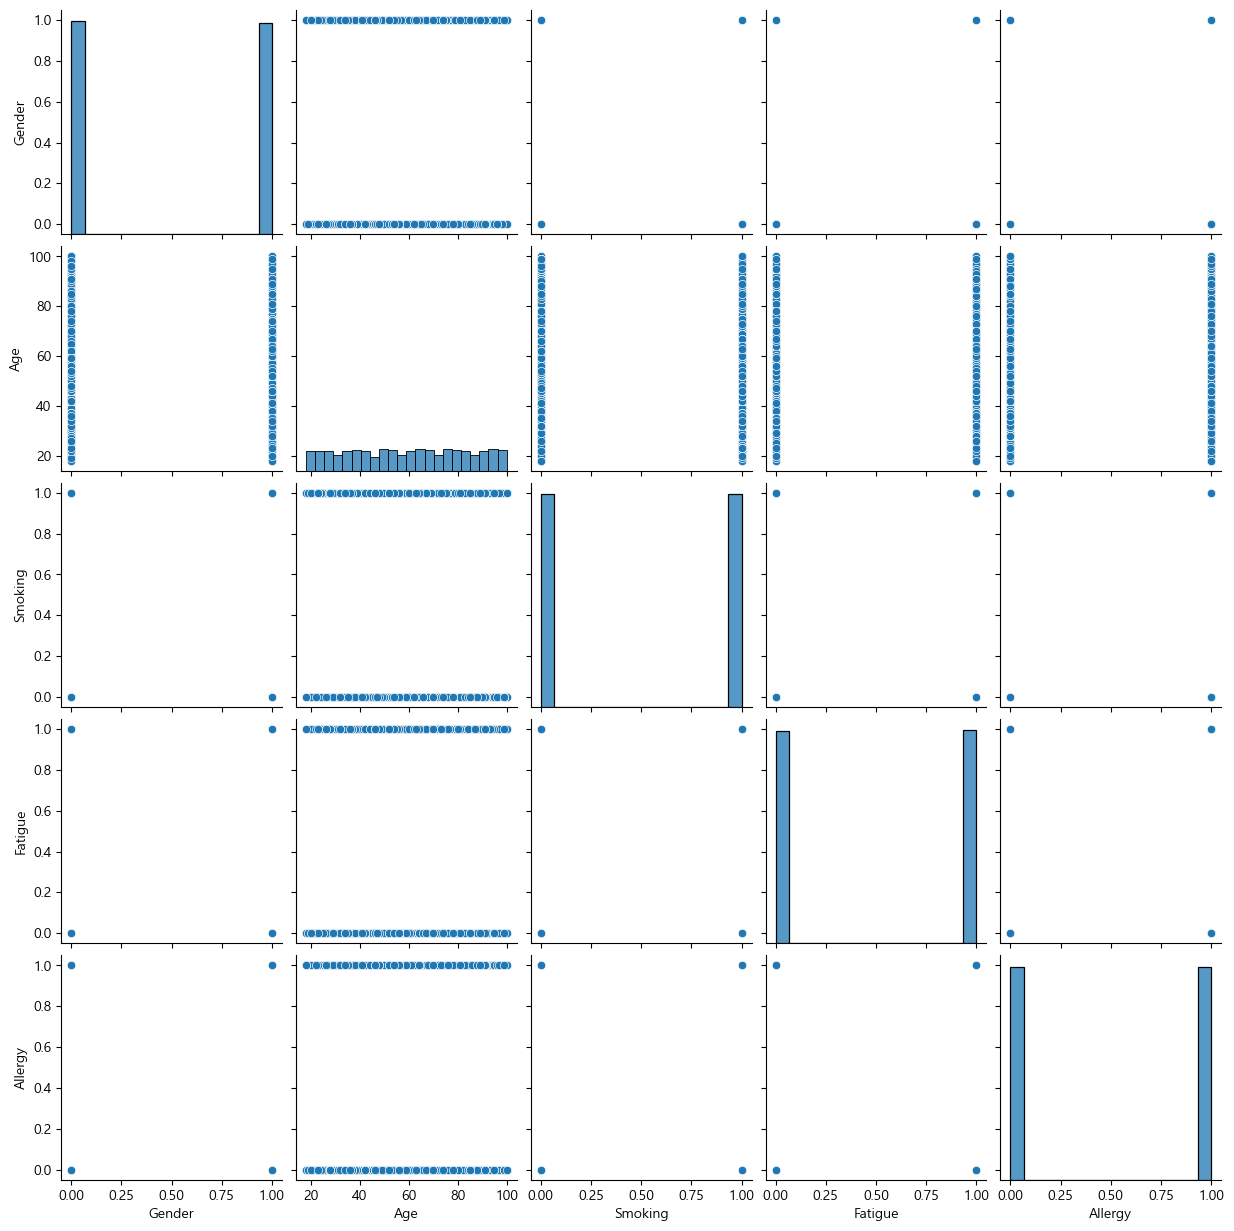

In [97]:
sb.pairplot(data=df, vars=["Gender","Age","Smoking","Fatigue","Allergy"])
plt.show()

In [117]:
df.corr()

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
Gender,1.000000,0.015459,0.007802,-0.011382,-0.007201,-0.014631
Age,0.015459,1.000000,-0.007384,-0.011392,-0.006372,-0.016963
Smoking,0.007802,-0.007384,1.000000,0.011199,0.019400,-0.004197
Fatigue,-0.011382,-0.011392,0.011199,1.000000,0.006201,-0.001854
Allergy,-0.007201,-0.006372,0.019400,0.006201,1.000000,0.004131
Cancer,-0.014631,-0.016963,-0.004197,-0.001854,0.004131,1.000000


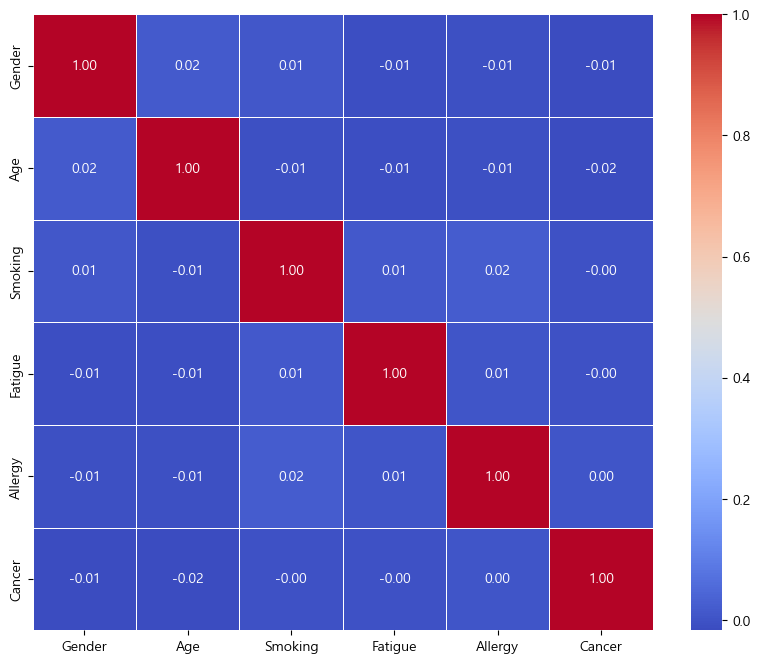

In [125]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()

In [96]:
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')